In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)  if pd.notna(x) else x)

In [3]:
df['job_posted_month'] =df['job_posted_date'].dt.strftime('%b')

In [45]:
df22 =df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]

In [48]:
da1  =df22.groupby('job_posted_month').size()

In [ ]:
da1

In [50]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


da1 = da1.reindex(month_order)


In [ ]:
da1

In [56]:
df_us_da = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]

In [57]:
df_us_da = df_us_da.explode('job_skills').copy()

In [58]:
df_us1 =df_us_da.pivot_table(columns ='job_skills',index='job_posted_month',aggfunc='size',fill_value=0)

In [59]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df_us1 = df_us1.reindex(month_order)


In [60]:
df_us1.loc['Total'] = df_us1.sum()

In [ ]:
df_us1

In [62]:
df_us1 =df_us1[df_us1.loc['Total'].sort_values(ascending =False).index]

In [63]:
df_us1 = df_us1.drop('Total')

In [ ]:
df_us1

In [65]:
df_us1 = df_us1.div(da1/100,axis=0)

In [ ]:
df_us1

In [68]:
df_f = df_us1.iloc[:, :5]

In [69]:
df_f

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


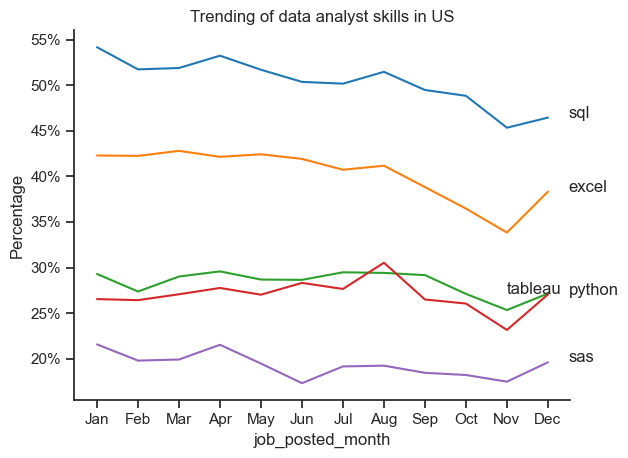

In [87]:
sns.lineplot(data = df_f,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
plt.legend().set_visible(False)
sns.despine()
plt.title('Trending of data analyst skills in US')
plt.ylabel('Percentage')
from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    if i==2:
        plt.text(10,df_f.iloc[-1,i],df_f.columns[i])
    else:
        plt.text(11.5,df_f.iloc[-1,i],df_f.columns[i])